In [7]:
import numpy as np
import sympy as sp
sp.init_printing(use_unicode=True)

In [8]:
x  = sp.symbols('x')
f_sym = 2*x**2 + 3*x -5
f_num = sp.lambdify(x, f_sym, 'numpy')
f_sym

In [14]:
def get_tanget_at(f, x, x_sym):
    y = sp.lambdify(x_sym, f, 'numpy')(x)
    df = sp.lambdify(x_sym, sp.diff(f,x_sym), 'numpy')
    m = df(x)
    # y = m*x + t
    t = y - m*x
    tangend = m*x_sym + t
    return tangend

In [15]:
t_1 = get_tanget_at(f_sym, 3,x)
t_1

In [34]:
def newtonverfahren(f_sym, x_sym, x_start):
    limit = 10**-6
    #print(limit)
    for _ in range(100):
        t = get_tanget_at(f_sym, x_start, x_sym)
        #sp.pprint(t)
        x_new = sp.solve(t, x_sym)[0]
        #print(x_new)
        #diff = x_new - x_start
        #print(diff)
        if abs(x_new - x_start) <= limit:
            return x_new
        x_start = x_new
    else: 
        raise ("Es konnte keine Nullstelle gefunden werden")

In [33]:
x_null = newtonverfahren(f_sym, x, 2)
print(round(x_null, 5))

1.00000000000000


In [35]:
def sekantenverfahren(f_sym, x_sym, x_nm1, x_n):
    limit = 10**-6
    f = sp.lambdify(x_sym, f_sym, 'numpy')
    for _ in range(100):
        x_np1 = x_n - f(x_n)*(x_n-x_nm1)/(f(x_n) - f(x_nm1))
        if abs(x_np1 - x_n) <= limit:
            return x_np1
        x_n, x_nm1 = x_np1, x_n
    else:
        raise ("Es konnte keine Nullstelle gefunden werden")

In [37]:
x_null = sekantenverfahren(f_sym, x, -3,-4)
print(round(x_null, 5))

-2.5


In [38]:
def sign(x):
    if x > 0:
        return  1
    elif x < 0:
        return -1
    else:
        return  0

In [39]:
def regular_falsi_verfahren(f_sym, x_sym, a, b):
    limit = 10**-6
    f = sp.lambdify(x_sym, f_sym, 'numpy')
    for _ in range(100):
        c = b - f(b)*(b-a)/(f(b) - f(a))
        if abs(c - b) <= limit:
            return c
        if  sign (f(a))== sign(f(c)):
            a = c
        else:
            b = c
    else:
        raise ("Es konnte keine Nullstelle gefunden werden")

In [40]:
x_null = regular_falsi_verfahren(f_sym, x, -2,-3)
print(round(x_null, 5))

-2.5


# Erste Programmieraufgabe:

In [41]:
def regularfalsi(f, a, b, tol):
    for _ in range(100):
        c = b - f(b)*(b-a)/(f(b) - f(a))
        if abs(c - b) <= tol:
            return c
        if  sign (f(a))== sign(f(c)):
            a = c
        else:
            b = c
    else:
        raise ("Es konnte keine Nullstelle gefunden werden")

In [42]:
def f(x):
    return 1 + np.cos(x)*np.cosh(x)

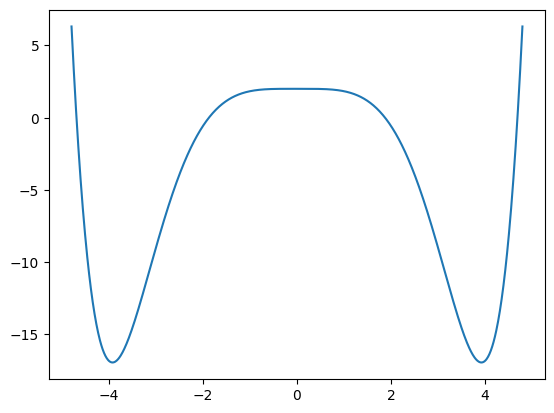

In [48]:
import matplotlib as mpl   
import matplotlib.pyplot as plt

plt.figure()
x = np.linspace(-4.8, 4.8, 1000)
plt.plot(x, f(x))
plt.show()

## Lösung:

In [52]:
x1 = regularfalsi(f, 5, 4, 10**-10)
x1

# Übungsaufgabe 2

In [ ]:
def f(x):
    return -2*np.log(x)

In [69]:
a = 0.6
b = 0.8
tol = 10**-10
for _ in range(1000):
    # c = b - f(b)*(b-a)/(f(b) - f(a))
    m = (f(b) - f(a))/(b-a)
    t = f(b) - m*b
    c = t/(1-m)
    if abs(c - b) <= tol:
        print(c)
        break
    a = b
    b = c
else:
    raise RuntimeError("Es konnte keine Nullstelle gefunden werden")

0.567143290409784


C:\Users\Lars\AppData\Local\Temp\ipykernel_15972\4137097716.py:2: RuntimeWarning: divide by zero encountered in log
  return -2*np.log(x) - x


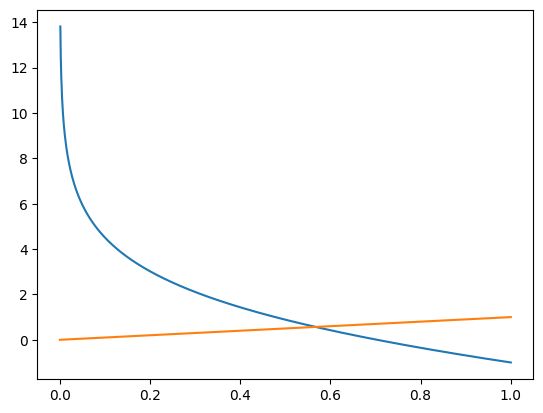

In [64]:
plt.figure()
x = np.linspace(0, 1, 1000)
plt.plot(x, f(x))
plt.plot(x , x  )
plt.show()

# Zweite Programmieraufgabe

In [ ]:
class Spring:
    def __init__(self, fixpunkt, laenge, steifigkeit):
        self.a = fixpunkt
        self.l = laenge
        self.s = steifigkeit

    def kraft_funktion(self, x,y):
        # x,y = sp.symbols('x y')
        norm2 = np.linalg.norm(np.array([x-self.a[0], y-self.a[1]]), 2)
        factor  = self.s*(self.l/norm2 - 1)
        f = np.array([
            factor*(x-self.a[0]),
            factor*(y-self.a[1])
        ])
        return f

    def jacobi(self,x,y):
        # x,y = sp.symbols('x y')
        norm2 = np.linalg.norm(np.array([x-self.a[0], y-self.a[1]]), 2)
        factor  = self.s*(self.l/norm2 - 1)
        I = np.array([[1, 0], [0, 1]])
        # transformed_x_a  = np.array([x-self.a[0]],[y-self.a[1]])*np.array([x-self.a[0] , y-self.a[1]])
        x_minus_a = np.array([x - self.a[0], y - self.a[1]])
        jac_f = factor*I - (self.s*self.l /norm2**3 )* (np.outer(x_minus_a, x_minus_a))
        return jac_f
    
    

In [81]:
class Weight:
    def __init__(self, masse):
        self.m = masse

    def kraft_funktion(self, x, y):
        g = -9.81 # m/s**2
        f = np.array([
            0,
            g*self.m
        ])
        return f

    def jacobi(self,x,y):
        jac_f = np.zeros((2,2))
        return jac_f

In [95]:
s1 = Spring( (0,0), 2, 10)
s2 = Spring( (1,1), 2, 10)
m = Weight(1)
# sum_f = s1.kraft_funktion(0, -4) + s2.kraft_funktion(0, -4) + m.kraft_funktion(0, -4)
sum_jac = s1.jacobi(0, -4) + s2.jacobi(0, -4) + m.jacobi(0, -4)

def sum_f(x,y):
    return s1.kraft_funktion(x, y) + s2.kraft_funktion(x, y) + m.kraft_funktion(x, y)

def sum_jac(x,y):
    return  s1.jacobi(x, y) + s2.jacobi(x, y) + m.jacobi(x, y)

x_vec = np.array([0, -4]) - np.linalg.inv(sum_jac(0,4)) @ sum_f(0,4)
x_vec

array([-0.03564338, -6.11198496])

In [99]:
def newton(x_vec):
    for _ in range(100):
        x_new = x_vec - np.linalg.inv(sum_jac(x_vec[0], x_vec[1])) @ sum_f(x_vec[0], x_vec[1])
        if np.linalg.norm(x_vec - x_new) <= 10**-5:
            return x_vec
        x_vec = x_new
    else:
        print("Nicht Stabil")


In [100]:
x_vec = np.array([0, -4])
x_sol = newton(x_vec)
x_sol

array([ 0.87769918, -1.89719208])

In [103]:
x_vec = np.array([0, 4])
x_sol = newton(x_vec)
x_sol

array([1.06051569, 1.87787206])

Es gibt ein Stabilitätskriterium von oben, wenn die Federn komprimiert werden, und ein weiteres, wenn die Federn auf Zug belasstet werden. 